In [2]:
import numpy as np
import sklearn
import tensorflow as tf

print("NumPy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("TensorFlow:", tf.__version__)



NumPy: 1.26.4
scikit-learn: 1.3.2
TensorFlow: 2.15.0


In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df = pd.read_csv(r"magic04.data", names=cols)

In [5]:
df.head()#We can see we don't have labels in these, so we are gonna add labels to them

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df["class"].unique()#g-> Gamma, h-> Hydrones
#converting this 0-> g and 1 -> h

array(['g', 'h'], dtype=object)

In [7]:
df["class"] = (df["class"] == "g").astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


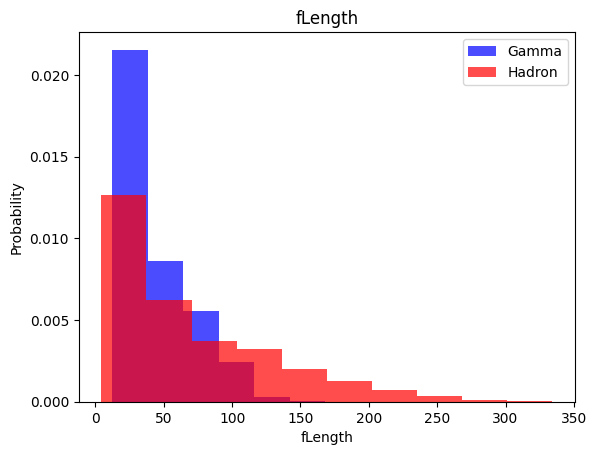

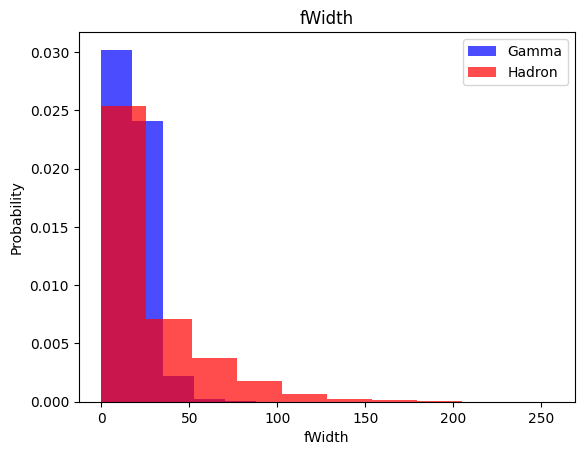

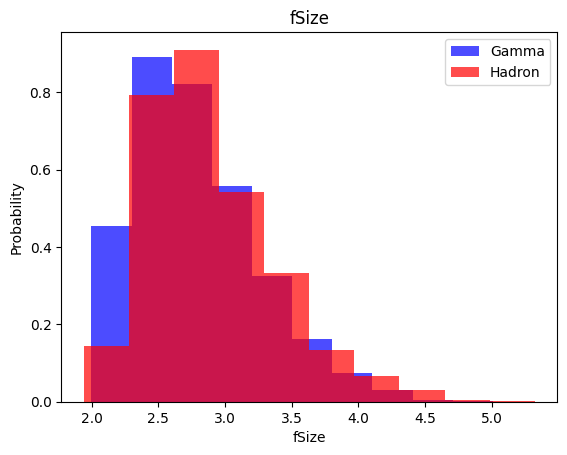

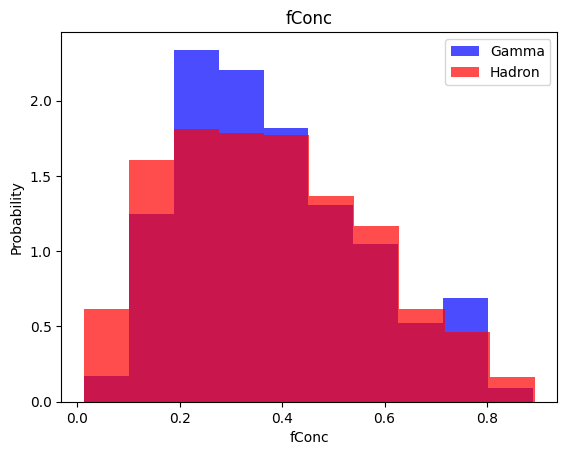

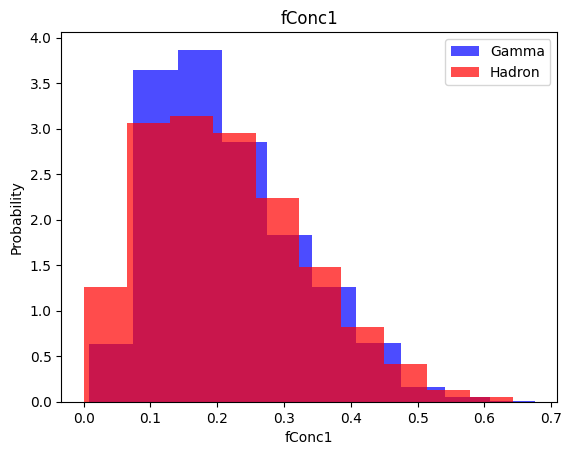

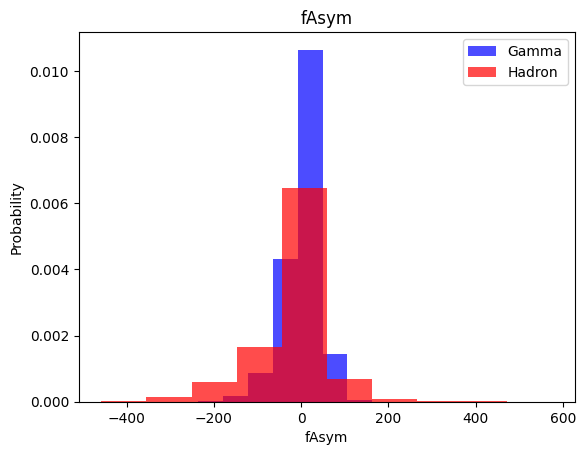

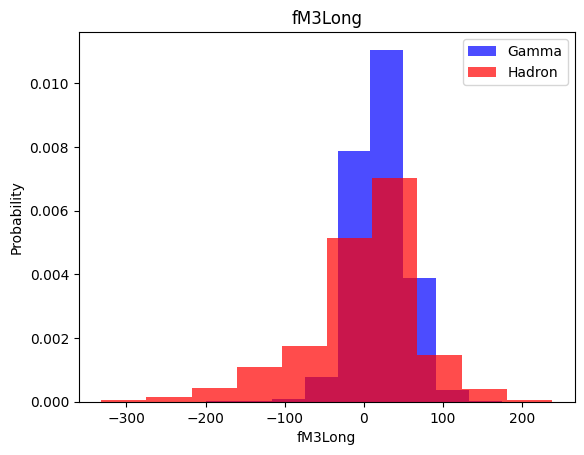

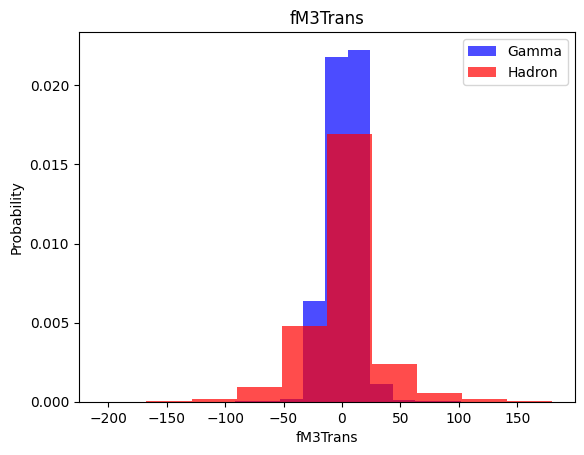

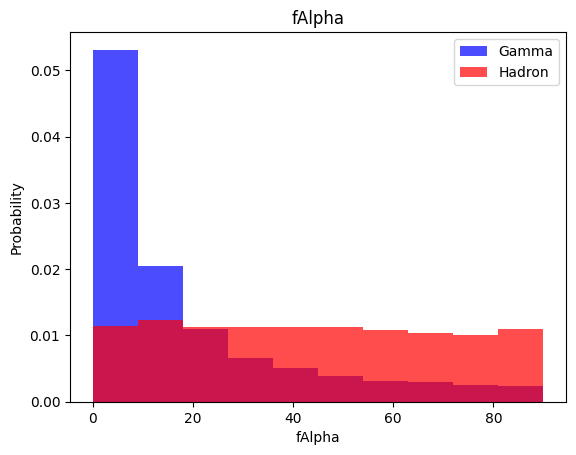

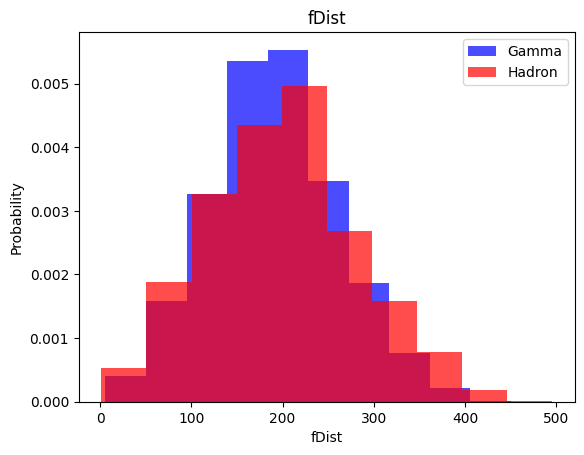

In [9]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="Gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0] [label], color="red", label="Hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Creating Train, Testing and Validation Datasets

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y  = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [12]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
10356,19.4408,15.0511,2.5539,0.4944,0.2835,-4.9169,13.1790,-8.4303,2.2614,47.0363,1
1031,37.4849,15.9605,2.7408,0.3470,0.2062,30.4798,23.5295,-14.0580,36.3065,198.1090,1
17661,71.6786,35.8227,3.4123,0.3189,0.1670,-81.2506,-60.9760,-28.0723,27.2898,374.6670,0
5831,19.9609,10.8728,2.2878,0.6186,0.3325,-7.1500,17.3875,-7.5802,9.7680,190.5310,1
14529,36.6435,10.8783,2.6699,0.5680,0.3453,38.5949,11.5718,8.7149,3.6132,148.6439,0
...,...,...,...,...,...,...,...,...,...,...,...
6817,23.8449,12.7567,2.4183,0.4771,0.2729,17.5340,16.7979,-6.8923,45.3060,150.8580,1
11506,62.9308,19.1078,2.9501,0.2782,0.1666,31.5240,51.5405,-13.1482,8.5800,219.1550,1
15015,69.3249,25.5888,3.3401,0.1400,0.1200,-85.1932,-56.3247,9.8262,48.3789,238.0608,0
8949,16.3137,11.4038,2.3365,0.6129,0.3710,-2.5906,6.0221,7.3284,10.7580,181.8560,1


In [13]:
print(len(train[train["class"] == 1])) #Gamma Ones
print(len(train[train["class"] == 0])) #Hydron Ones

7389
4023


In [14]:
train, X_train, y_train  =  scale_dataset(train, oversample=True)
valid, X_valid, y_valid  =  scale_dataset(valid, oversample=False)
test, X_test, y_test  =  scale_dataset(test, oversample=False)

In [15]:
len(y_train)

14778

In [16]:
sum(y_train == 1)

7389

In [17]:
sum(y_train == 0)

7389

# Using k-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # for classification report

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5) #Try n_neighbors value 1,3 and 5 and check the result
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1366
           1       0.85      0.86      0.86      2438

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Using Naive bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [24]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.39      0.51      1366
           1       0.73      0.91      0.81      2438

    accuracy                           0.72      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [27]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1366
           1       0.84      0.82      0.83      2438

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machine

In [28]:
#SVM Implementation
from sklearn.svm import SVC

In [29]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [30]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1366
           1       0.88      0.89      0.89      2438

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Network

In [31]:
import tensorflow as tf

In [32]:
def plot_history(history):
    """Plot training and validation loss across epochs."""
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()

In [33]:
# plot_history(history)

In [34]:
# # Create a sequential neural network model
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), 
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(num_nodes, activation='relu'), 
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]) 
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
        metrics=['accuracy'])

    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    return nn_model, history

In [35]:
# history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0) using verbose won't print the epoch number and loss

In [36]:
# plot_loss(history)
# plot_accuracy(history)

16 nodes, droupout prob 0, lr 0.01, batch size 32


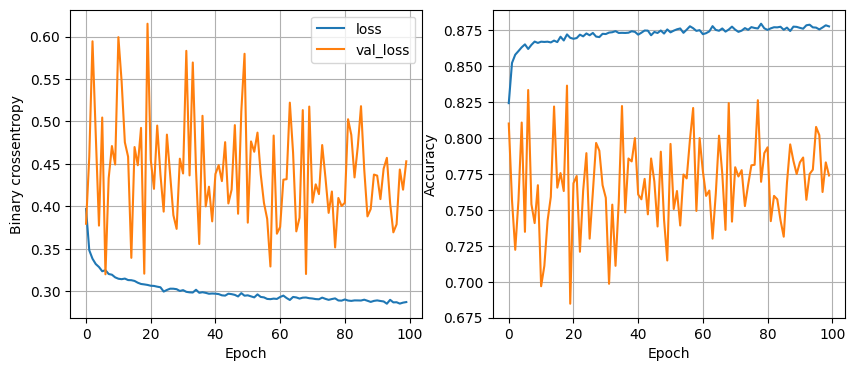

119/119 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8691
16 nodes, droupout prob 0, lr 0.01, batch size 64


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, droupout prob {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [ ]:
least_loss_model.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'predict'